In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# pip install -i https://test.pypi.org/simple/ my_krml_25076922==2024.0.3.3

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import boxcox

/Users/vega7unk/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [38]:
path ='/Users/vega7unk/Documents/3rd_Sem_DSI/Adv_ML/AT2/Project/adv_mla_at2/data'

# sales_data = pd.read_csv(f'{path}/df_eda.csv')
sales_data = pd.read_csv(f'{path}/df_cleaned.csv')
CAT_df_cleaned = pd.read_csv(f'{path}/df_cleaned_CATdtype.csv')

In [46]:
print(CAT_df_cleaned.head())

         item_id    dept_id   cat_id store_id state_id  total_sales  \
0  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1       CA          0.0   
1  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1       CA          0.0   
2  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1       CA          0.0   
3  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1       CA          0.0   
4  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1       CA          0.0   

   day_of_week  month  year  
0            5      1  2011  
1            5      1  2011  
2            5      1  2011  
3            5      1  2011  
4            5      1  2011  


In [48]:
CAT_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47107050 entries, 0 to 47107049
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   item_id      object 
 1   dept_id      object 
 2   cat_id       object 
 3   store_id     object 
 4   state_id     object 
 5   total_sales  float64
 6   day_of_week  int64  
 7   month        int64  
 8   year         int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ GB


In [39]:
CAT_df_cleaned['cat_id'].value_counts()

cat_id
FOODS        22201650
HOUSEHOLD    16176150
HOBBIES       8729250
Name: count, dtype: int64

In [5]:
# from my_krml_25076922.features.data_processing import reduce_mem_usage

# # Apply the memory reduction function to the sales_train_long DataFrame
# sales_data = reduce_mem_usage(sales_data, int_cast=True, obj_to_category=True)

In [40]:
CAT_df_cleaned['dept_id'].value_counts()

dept_id
FOODS_3        12715350
HOUSEHOLD_1     8219400
HOUSEHOLD_2     7956750
HOBBIES_1       6427200
FOODS_2         6149100
FOODS_1         3337200
HOBBIES_2       2302050
Name: count, dtype: int64

In [41]:
CAT_df_cleaned['item_id'].value_counts()

item_id
HOBBIES_1_001      15450
FOODS_2_210        15450
FOODS_2_201        15450
FOODS_2_202        15450
FOODS_2_203        15450
                   ...  
HOUSEHOLD_1_464    15450
HOUSEHOLD_1_465    15450
HOUSEHOLD_1_466    15450
HOUSEHOLD_1_467    15450
FOODS_3_827        15450
Name: count, Length: 3049, dtype: int64

In [43]:
CAT_df_cleaned['store_id'].value_counts()

store_id
CA_1    4710705
CA_2    4710705
CA_3    4710705
CA_4    4710705
TX_1    4710705
TX_2    4710705
TX_3    4710705
WI_1    4710705
WI_2    4710705
WI_3    4710705
Name: count, dtype: int64

In [47]:
CAT_df_cleaned['state_id'].value_counts()

state_id
CA    18842820
TX    14132115
WI    14132115
Name: count, dtype: int64

In [44]:
CAT_df_cleaned.shape

(47107050, 9)

In [50]:
store_ids = CAT_df_cleaned['store_id'].unique()
store_datasets = {store_id: CAT_df_cleaned[CAT_df_cleaned['store_id'] == store_id] for store_id in store_ids}

AttributeError: 'dict' object has no attribute 'head'

AttributeError: 'dict' object has no attribute 'info'

In [7]:
sales_data.isnull().sum()

item_id        0
dept_id        0
cat_id         0
store_id       0
state_id       0
total_sales    0
day_of_week    0
month          0
year           0
dtype: int64

In [8]:
sales_data.describe()


,item_id,dept_id,cat_id,store_id,state_id,total_sales,day_of_week,month,year
count,4.710705e+07,4.710705e+07,4.710705e+07,4.710705e+07,4.710705e+07,4.710705e+07,4.710705e+07,4.710705e+07,4.710705e+07
mean,1.524000e+03,3.161036e+00,8.720892e-01,4.500000e+00,9.000000e-01,3.032094e+00,3.009061e+00,6.325566e+00,2.012703e+03
std,8.801704e+02,1.915904e+00,8.934944e-01,2.872281e+00,8.306624e-01,9.173952e+00,2.003213e+00,3.459918e+00,1.241316e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.011000e+03
25%,7.620000e+02,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.012000e+03
50%,1.524000e+03,3.000000e+00,1.000000e+00,4.500000e+00,1.000000e+00,0.000000e+00,3.000000e+00,6.000000e+00,2.013000e+03
75%,2.286000e+03,5.000000e+00,2.000000e+00,7.000000e+00,2.000000e+00,2.680000e+00,5.000000e+00,9.000000e+00,2.014000e+03
max,3.048000e+03,6.000000e+00,2.000000e+00,9.000000e+00,2.000000e+00,2.164000e+03,6.000000e+00,1.200000e+01,2.015000e+03


In [9]:
# plt.figure(figsize=(10, 6))
# sns.histplot(sales_data['total_sales'], kde=True, bins=30)
# plt.title('Distribution of Total Sales')
# plt.xlabel('Total Sales')
# plt.ylabel('Frequency')
# plt.show()

In [10]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='state_id', y='total_sales', data=sales_data)
# plt.title('Total Sales Distribution by State')
# plt.xlabel('State')
# plt.ylabel('Total Sales')
# plt.show()

In [11]:
# # Convert the 'date' column to datetime type if not already done
# sales_data['date'] = pd.to_datetime(sales_data['date'])

# # Aggregate sales by date to visualize overall sales trends
# sales_trend = sales_data.groupby('date')['total_sales'].sum().reset_index()

# plt.figure(figsize=(14, 6))
# sns.lineplot(x='date', y='total_sales', data=sales_trend)
# plt.title('Total Sales Over Time')
# plt.xlabel('Date')
# plt.ylabel('Total Sales')
# plt.show()

In [12]:
# # Aggregate sales by state and date
# state_sales_trend = sales_data.groupby(['date', 'state_id'])['total_sales'].sum().reset_index()

# plt.figure(figsize=(14, 6))
# sns.lineplot(x='date', y='total_sales', hue='state_id', data=state_sales_trend)
# plt.title('Total Sales Over Time by State')
# plt.xlabel('Date')
# plt.ylabel('Total Sales')
# plt.legend(title='State')
# plt.show()

# # Aggregate sales by store and visualize for selected stores
# selected_stores = sales_data['store_id'].unique()[:3]  # Select first 3 stores for visualization
# store_sales_trend = sales_data[sales_data['store_id'].isin(selected_stores)]
# store_sales_trend = store_sales_trend.groupby(['date', 'store_id'])['total_sales'].sum().reset_index()

# plt.figure(figsize=(14, 6))
# sns.lineplot(x='date', y='total_sales', hue='store_id', data=store_sales_trend)
# plt.title('Total Sales Over Time by Store')
# plt.xlabel('Date')
# plt.ylabel('Total Sales')
# plt.legend(title='Store ID')
# plt.show()


In [13]:
# # Pairplot to see relationships between numerical features
# sns.pairplot(sales_data[['total_sales', 'day_of_week', 'month']])
# plt.show()

# # Heatmap of correlations between numerical features
# plt.figure(figsize=(10, 6))
# correlation_matrix = sales_data.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()


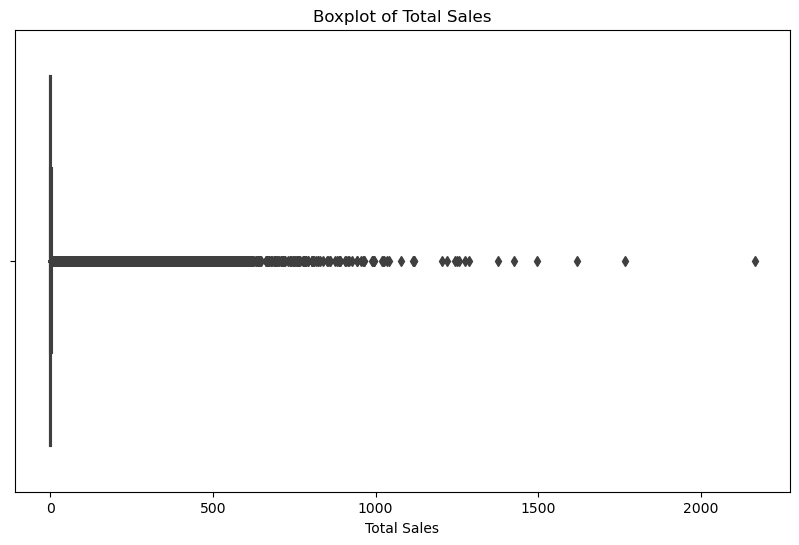

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a boxplot to visualize the distribution of total_sales
plt.figure(figsize=(10, 6))
sns.boxplot(x=sales_data['total_sales'])
plt.title('Boxplot of Total Sales')
plt.xlabel('Total Sales')
plt.show()


In [15]:
df = sales_data.copy()

In [16]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['total_sales'].quantile(0.25)
Q3 = df['total_sales'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['total_sales'] < lower_bound) | (df['total_sales'] > upper_bound)]

# Display the number of outliers
print(f"Number of outliers in total_sales: {outliers.shape[0]}")

# Display a few outliers
outliers.head()


Number of outliers in total_sales: 6524111


,item_id,dept_id,cat_id,store_id,state_id,total_sales,day_of_week,month,year
21,1458,3,1,0,0,13.72,5,1,2011
22,1459,3,1,0,0,6.88,5,1,2011
28,1465,3,1,0,0,14.88,5,1,2011
49,1486,3,1,0,0,19.69,5,1,2011
57,1494,3,1,0,0,7.97,5,1,2011


In [17]:
df.shape

(47107050, 9)

In [18]:
outliers['state_id'].value_counts()

state_id
0    2932710
1    1860360
2    1731041
Name: count, dtype: int64

In [19]:
sales_by_state = df.groupby('state_id')['total_sales'].describe()
sales_by_state

,count,mean,std,min,25%,50%,75%,max
state_id,,,,,,,,
0,18842820.0,3.412234,10.083693,0.0,0.0,0.0,3.00,2164.0
1,14132115.0,2.928594,9.029107,0.0,0.0,0.0,2.48,1767.0
2,14132115.0,2.628742,7.941828,0.0,0.0,0.0,1.98,642.5


In [20]:
sales_by_item = df.groupby('item_id')['total_sales'].describe()
sales_by_item

,count,mean,std,min,25%,50%,75%,max
item_id,,,,,,,,
0,15450.0,1.410162,2.813507,0.0,0.0,0.00,2.24,53.75
1,15450.0,3.379679,6.648425,0.0,0.0,0.00,7.88,75.80
2,15450.0,2.162059,3.788114,0.0,0.0,0.00,2.88,63.38
3,15450.0,12.507871,15.447701,0.0,0.0,7.12,19.58,206.50
4,15450.0,3.724532,7.456277,0.0,0.0,0.00,3.54,106.20
...,...,...,...,...,...,...,...,...
3044,15450.0,2.411344,4.528758,0.0,0.0,0.00,3.97,67.50
3045,15450.0,1.064331,3.097508,0.0,0.0,0.00,0.00,55.60
3046,15450.0,3.126755,8.538236,0.0,0.0,0.00,0.00,94.90


In [22]:
from scipy import stats

# Calculate Z-scores for total_sales
z_scores = stats.zscore(df['total_sales'])

# Find the outliers where Z-score is greater than 3 or less than -3
outliers_z = df[(z_scores > 3) | (z_scores < -3)]

# Display the number of outliers
print(f"Number of outliers in total_sales using Z-score method: {outliers_z.shape[0]}")

# Display a few outliers
outliers_z.head()


Number of outliers in total_sales using Z-score method: 714645


,item_id,dept_id,cat_id,store_id,state_id,total_sales,day_of_week,month,year
75,1512,3,1,0,0,59.84,5,1,2011
86,1523,3,1,0,0,39.40,5,1,2011
103,1540,3,1,0,0,48.47,5,1,2011
288,1725,3,1,0,0,39.00,5,1,2011
355,1792,3,1,0,0,71.80,5,1,2011


/Users/vega7unk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


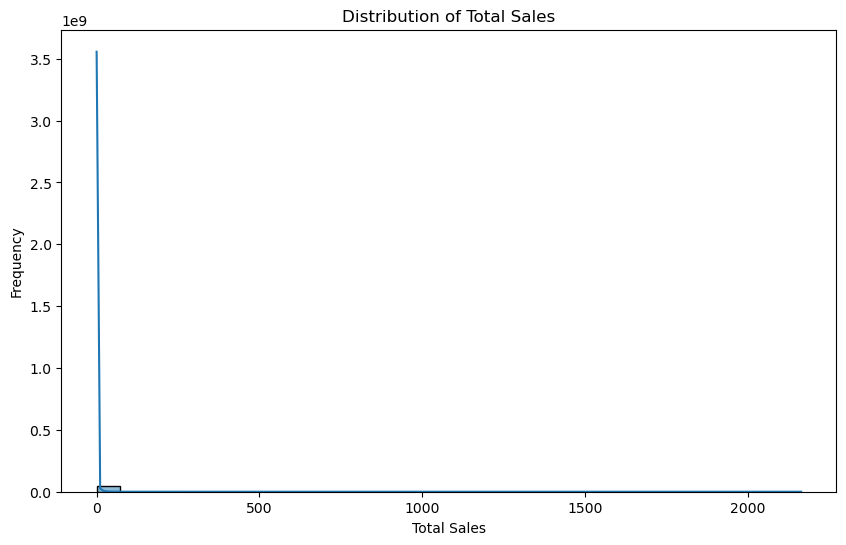

In [23]:
# Plot a histogram to check for distribution and potential outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['total_sales'], kde=True, bins=30)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()


In [24]:
# Check the skewness of 'total_sales' in the dataset
total_sales_skewness = df['total_sales'].skew()
print(f"Skewness of total_sales: {total_sales_skewness}")



Skewness of total_sales: 13.204313063374315


Skewness of square root transformed total_sales: 2.237465834859933


/Users/vega7unk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


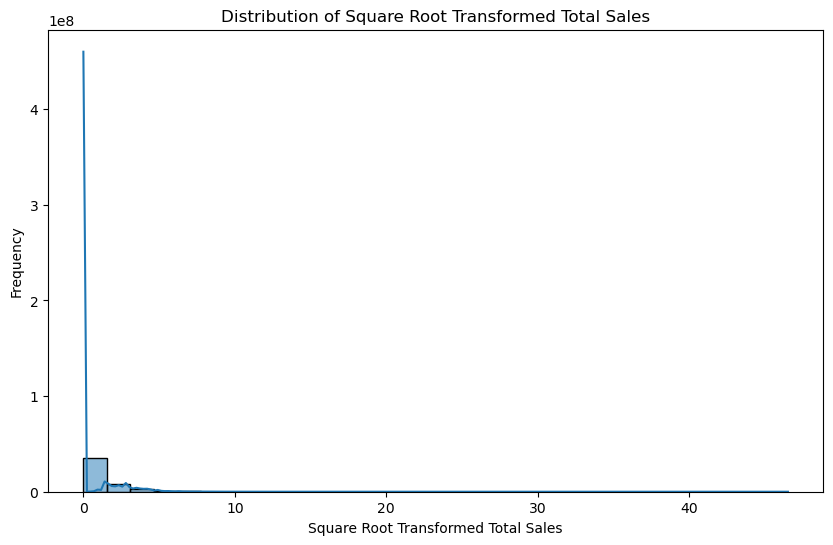

In [25]:
# Apply square root transformation
df['total_sales_sqrt'] = np.sqrt(df['total_sales'])

# Check skewness after square root transformation
total_sales_sqrt_skewness = df['total_sales_sqrt'].skew()
print(f"Skewness of square root transformed total_sales: {total_sales_sqrt_skewness}")

# Plot the transformed data to visualize the impact
plt.figure(figsize=(10, 6))
sns.histplot(df['total_sales_sqrt'], kde=True, bins=30)
plt.title('Distribution of Square Root Transformed Total Sales')
plt.xlabel('Square Root Transformed Total Sales')
plt.ylabel('Frequency')
plt.show()

Skewness of log-transformed total_sales: 1.4619903261800058


/Users/vega7unk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


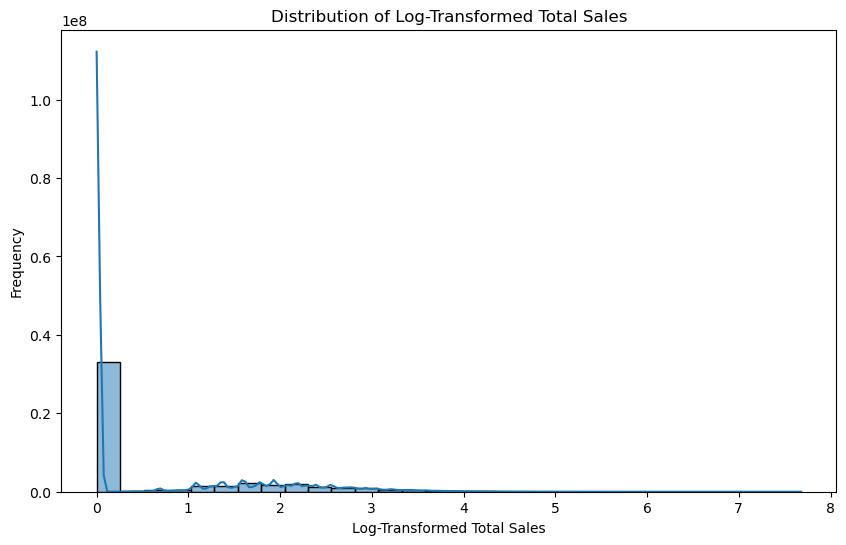

In [26]:
# Apply log transformation (adding 1 to avoid log(0))
df['total_sales_log'] = np.log1p(sales_data['total_sales'])

# Check skewness after log transformation
total_sales_log_skewness = df['total_sales_log'].skew()
print(f"Skewness of log-transformed total_sales: {total_sales_log_skewness}")

# Plot the log-transformed data to visualize the impact
plt.figure(figsize=(10, 6))
sns.histplot(df['total_sales_log'], kde=True, bins=30)
plt.title('Distribution of Log-Transformed Total Sales')
plt.xlabel('Log-Transformed Total Sales')
plt.ylabel('Frequency')
plt.show()


### Applying Changes

In [32]:
# Apply log transformation to reduce skewness
sales_data['total_sales_log'] = np.log1p(sales_data['total_sales'])

# Calculate Q1 and Q3 for log-transformed data
Q1 = sales_data['total_sales_log'].quantile(0.25)
Q3 = sales_data['total_sales_log'].quantile(0.75)
IQR = Q3 - Q1

# Define acceptable range for log-transformed total_sales
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers based on log-transformed data
filtered_sales_data = sales_data[(sales_data['total_sales_log'] >= lower_bound) & (sales_data['total_sales_log'] <= upper_bound)]

print(f"Number of rows before removing outliers: {sales_data.shape[0]}")
print(f"Number of rows after removing outliers: {filtered_sales_data.shape[0]}")

Number of rows before removing outliers: 47107050
Number of rows after removing outliers: 46067836


/Users/vega7unk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


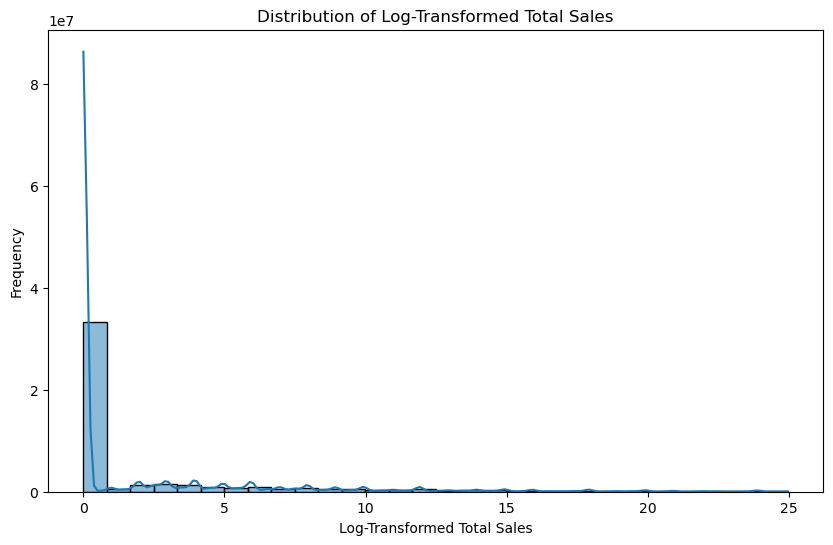

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_sales_data['total_sales'], kde=True, bins=30)
plt.title('Distribution of Log-Transformed Total Sales')
plt.xlabel('Log-Transformed Total Sales')
plt.ylabel('Frequency')
plt.show()

In [34]:
filtered_sales_data.head()

,item_id,dept_id,cat_id,store_id,state_id,total_sales,day_of_week,month,year,total_sales_log
0,1437,3,1,0,0,0.0,5,1,2011,0.0
1,1438,3,1,0,0,0.0,5,1,2011,0.0
2,1439,3,1,0,0,0.0,5,1,2011,0.0
3,1440,3,1,0,0,0.0,5,1,2011,0.0
4,1441,3,1,0,0,0.0,5,1,2011,0.0


In [36]:
filtered_sales_data = filtered_sales_data.drop(columns=['total_sales_log'])

In [37]:
from sklearn.ensemble import IsolationForest

# Define the features to use for Isolation Forest
features = ['total_sales', 'day_of_week', 'month', 'store_id', 'item_id']
X = sales_data[features]

# Train an Isolation Forest model
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
sales_data['anomaly'] = isolation_forest.fit_predict(X)

# Identify the outliers
outliers_if = sales_data[sales_data['anomaly'] == -1]
print(f"Number of outliers detected using Isolation Forest: {outliers_if.shape[0]}")


Number of outliers detected using Isolation Forest: 471071


In [ ]:
import os

# Define the directory path
output_dir = '../data'

# Save df_cleaned_scaled as a CSV file
df_cleaned.to_csv(os.path.join(output_dir, 'df_transformed.csv'), index=False)

# Print confirmation
print(f"Files saved successfully in '{output_dir}' directory.")